# Introduction
The entire world is shaken by the recent outbreak of coronavirus and almost all countries have been significantly affected by the global pandemic.All countries have been affected differently in some country’s like the USA impact due to COVID has been significant.The total number of deaths due to COVID 19 crossed 100K mark on 26th May in the USA. With the daily increase in COVID-19 and limited hospital capacity, it is extremely difficult for healthcare workers to monitor all the people who tested positive for COVID 19 since the fatality rate is less than 10% in most of the countries. An article published by CNBC states that a significant number of states lack enough ICU beds in their hospitals to deal with the projected wave of COVID 19 cases. However, Since most of the countries are updating data related to COVID 19 daily. With the advancement in machine learning using historical data, it is easy to predict which people are at risk due to COVID 19.

   *If we can accurately predict for all the people infected with COVID 19 whether the patient is going to die or not. Then the patient can be given more priority and can be monitored continuously to prevent the patient from dying*.And also, there has been so much confusion around the effect of COVID 19 for different age groups and genders. Using the data published in Statistics Canada, I was able to study and verify some facts.

### Installing all required data and libraries

In [1]:
library(tidyverse) 
library(plyr)
library(dplyr)
library(ggplot2)
library(dplyr)
library(scales)
library(readr)
require(GGally)
library(caTools)
library(corrplot)
library(e1071)
library(caret)
library(klaR)
library(randomForest)
library(Hmisc)
library(party)
library(matrixStats)
library(sqldf)
library(reshape2)
library(gganimate)

data <- read_csv("../input/canada-covid-19/data_class.csv")
data_num <- read_csv("../input/canada-covid-19/data_num.csv")
data<- as.data.frame(data)
data_num<- as.data.frame(data_num)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   0.8.5     
✔ tidyr   1.0.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    comp

# Data Visualization

### How are different age groups and genders affected?

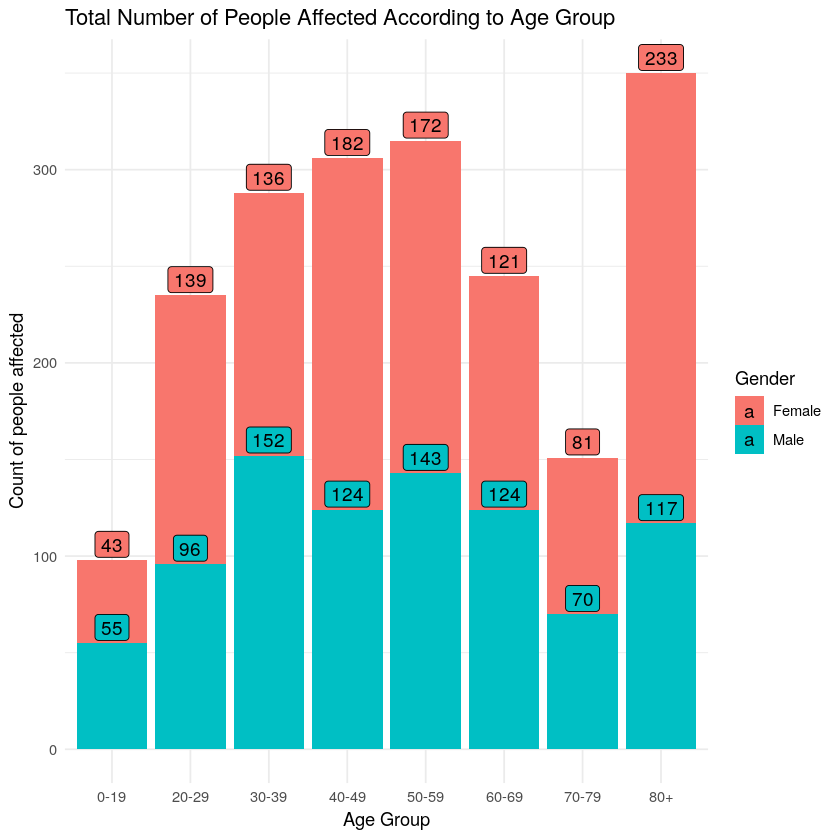

In [2]:
#Filtering people who are vulnerable according to age group
ggplot(data, aes(x= Age_group,fill=Gender))+ 
  geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=-0.1) + theme_minimal()+
  labs(x = "Age Group", y = "Count of people affected",title="Total Number of People Affected According to Age Group")


It can be seen that the infection rate due to COVID 19 is higher among the younger population. The Infection rate is higher among females when compared to males.So what is the fatality rate for these infected populations?

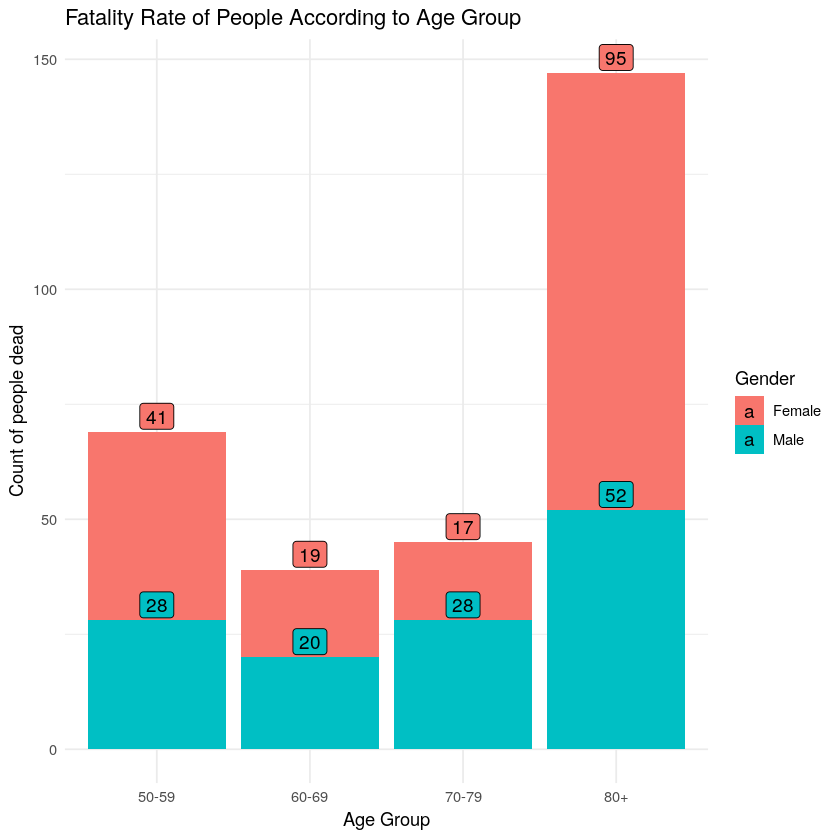

In [3]:
#Filtering people who died according to age group

total_death=filter(data,Death =="Yes")
ggplot(total_death, aes(x= Age_group, fill=Gender)) + 
  geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=-0.1) + theme_minimal()+
  labs( x = "Age Group", y = "Count of people dead",title="Fatality Rate of People According to Age Group")

Even though, the infection rate is higher among younger adults the fatality rate is high among the older population with almost 80% among both male and female populations. Surprisingly, the fatality rate is very high among the female aged 80+ years with almost double when compared with fatality rate of the male population. This infers that women population aged 80+ years are more prone to death. There are no deaths reported in Canada for the population aged less than 50 years.

### How are age groups affected due to different types of transmission?

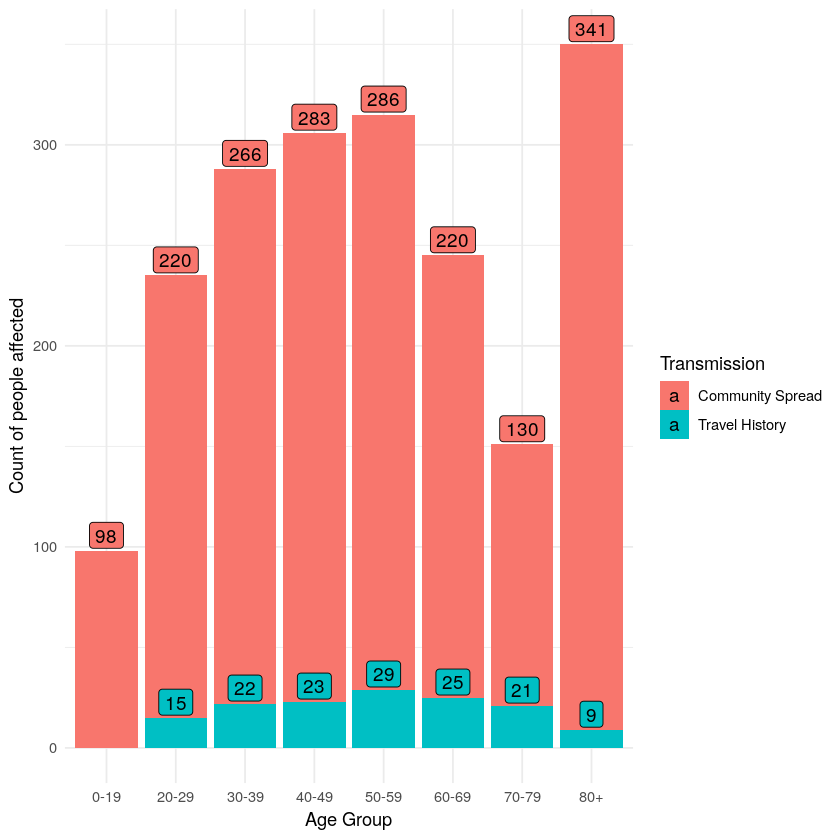

In [4]:
#Mode of transmission for different age groups
ggplot(data, aes(x= Age_group,fill=Transmission)) + 
  geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=-0.1)+theme_minimal() +
  labs(x = "Age Group", y = "Count of people affected")

There are no cases related to Travel History for people aged below 20 years. More cases are related to community spread

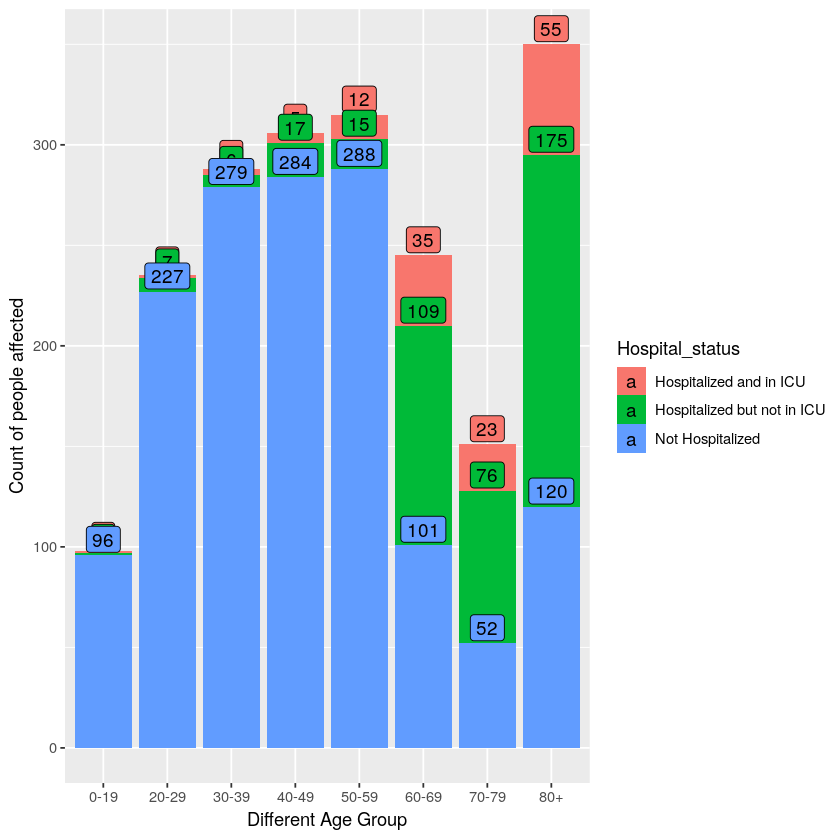

In [5]:
  #People  Hospitalized
ggplot(data, aes(x= Age_group,fill=Hospital_status)) + geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=-0.1) +
  labs(x = "Different Age Group", y = "Count of people affected")

Young people below the age of 20 years are not completely immune to COVID 19 some people required Hospitalization and also ICU to survive. It can be seen that most age group people survived without admitting to ICU. More number of people that needed ICU attention to survive are aged 80+ years.

### Which Age group people survived after getting medical attention?

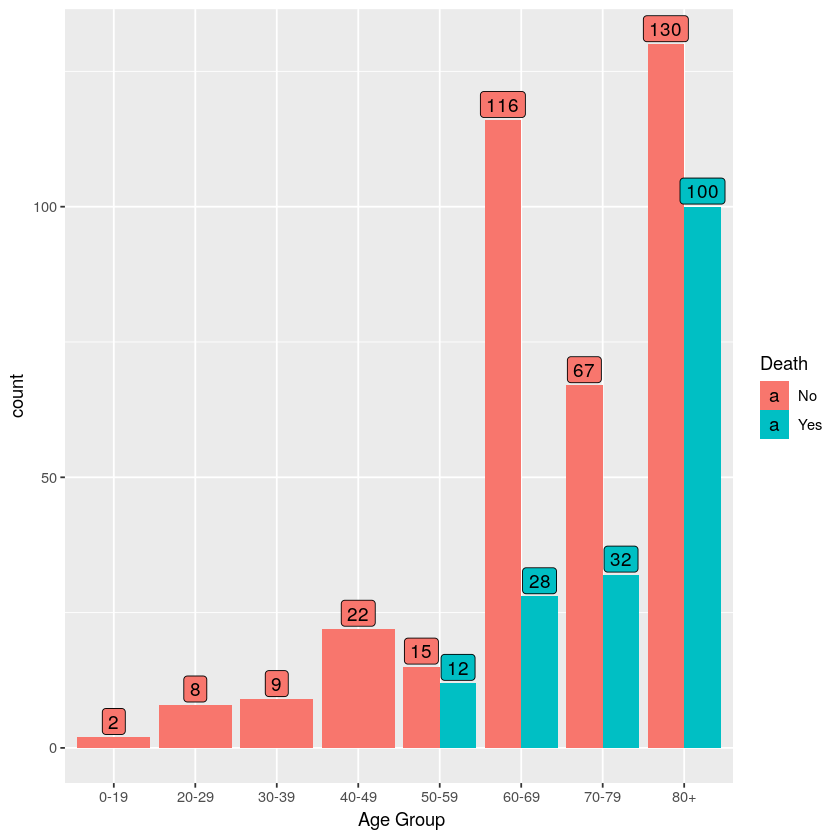

In [6]:
#People who got admitted in Hospital and survived
total_ICU=filter(data,(Hospital_status!='Not Hospitalized'))

ggplot(total_ICU, aes(x= Age_group,fill =Death)) + 
  geom_bar(position=position_dodge(width=0.9)) +geom_label(aes(label=..count..),stat='count',position=position_dodge(width=0.9), size=4,vjust = -0.1) +
  labs(x = " Age Group")

All the people aged below 50 years survived after getting medical attention. Most deaths are recorded among the people aged 80+.

### In which region more people are being Hospitalized?

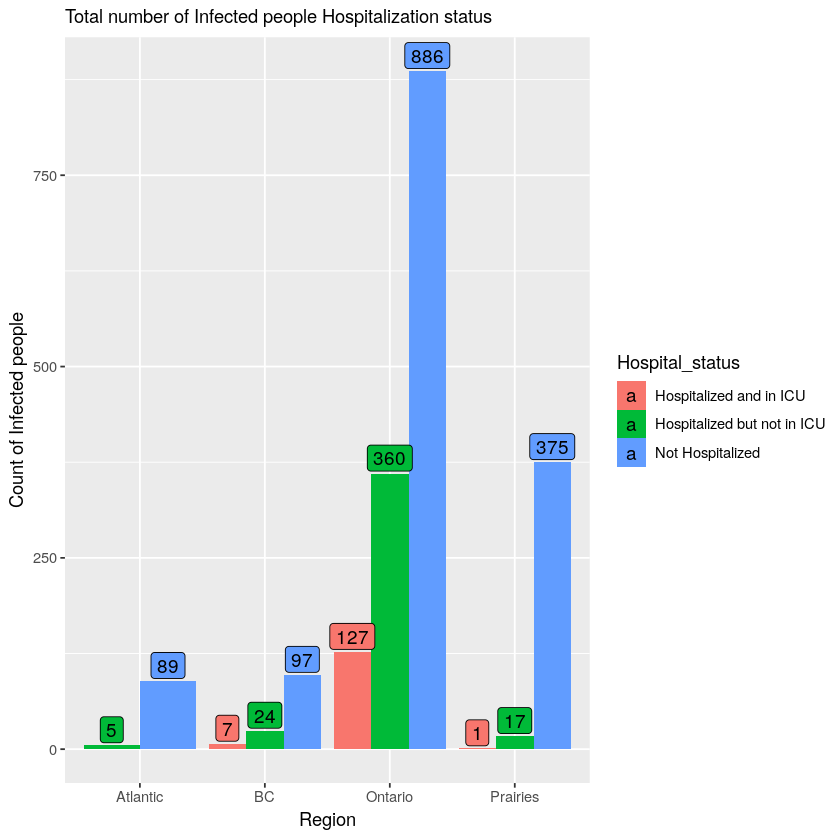

In [7]:
ggplot(data, aes(x= Region,fill=Hospital_status)) + geom_bar(position=position_dodge(width=0.9))+
  geom_label(stat='count',aes(label=..count..), size=4,position=position_dodge(width=0.9),vjust=-0.1)+
  labs(y="Count of Infected people",subtitle="Total number of Infected people Hospitalization status")

Atlantic region includes New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland, and Labrador. Ontario region includes Ontario and Nunavut. And Prairies region includes Alberta, Saskatchewan, Manitoba and the Northwest Territories. British Columbia and Yukon are considered as BC. It can be seen that the majority of the cases are from the Ontario region and almost 35% of the people that got infected with COVID 19 are hospitalized when compared with 25% in British Columbia. Percent of people hospitalized in both the Atlantic and the Prairies regions is less than 5%.

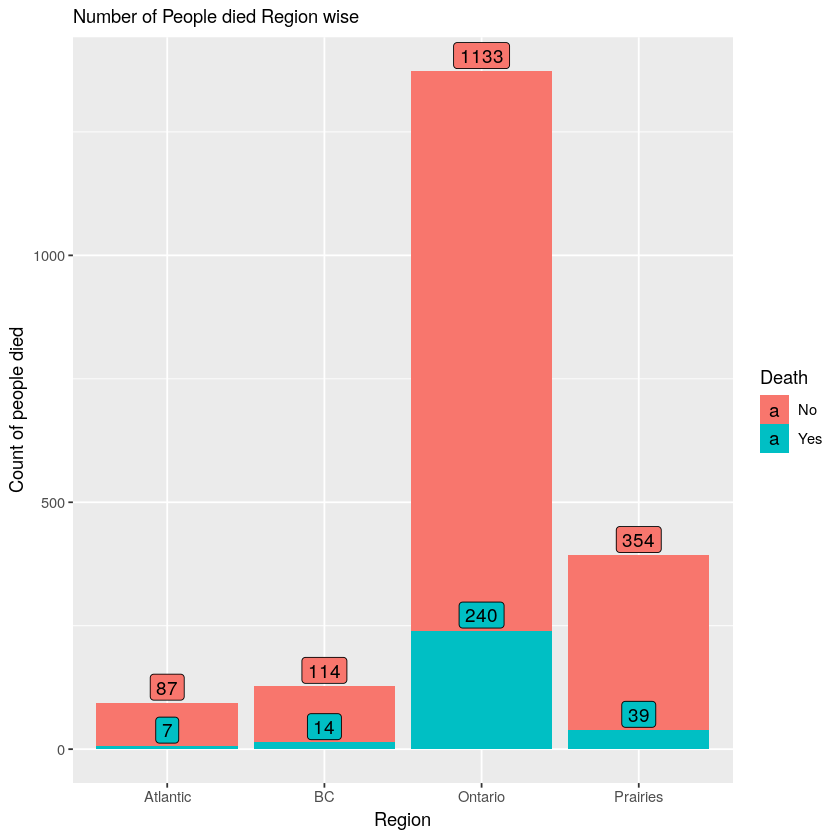

In [8]:
ggplot(data, aes(x= Region,fill=Death)) + geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=-0.1)+
  labs(y="Count of people died",subtitle="Number of People died Region wise")

The Ontario Region had the highest fatality rate with 17.5% of the infected people dying from Covid-19, Atlantic Region having the lowest with only 7.45% of the infected people dying. The Fatality Rate in the Prairies region is 9.9%. Surprisingly even with more people being hospitalized in British Columbia fatality rate is 11% which is very good when compared with Ontario.

### Are the infected people showing any symptoms?

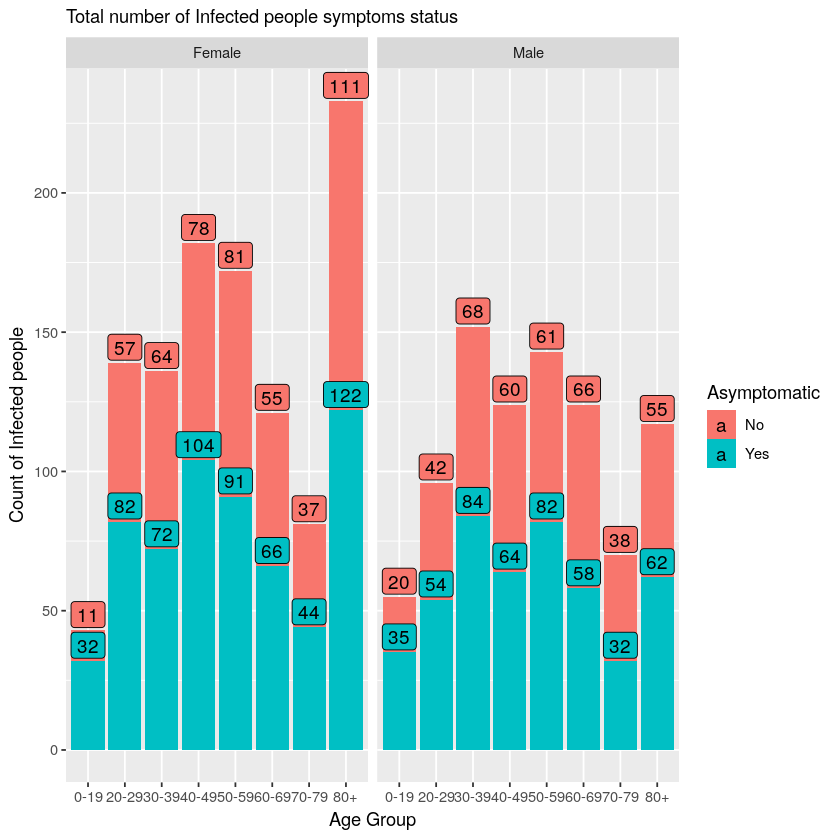

In [9]:
ggplot(data, aes(x=Age_group,fill=Asymptomatic),group=Gender) + geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=-0.1)+
  facet_wrap(~Gender)+labs(x="Age Group",
                           y="Count of Infected people",subtitle="Total number of Infected people symptoms status")


Out of all the people who tested positive for COVID 19. It can be seen that almost 50% of the people in both genders are not showing any symptoms even after being infected with COVID 19.
It will be interesting to see the number of people that are being hospitalized after some days without showing any symptoms.

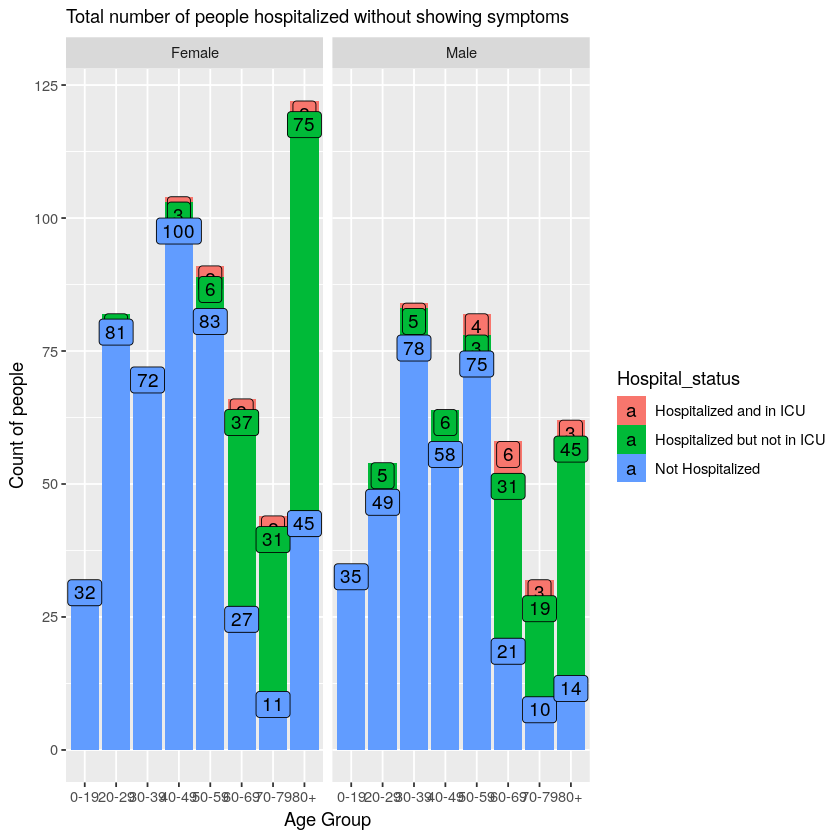

In [10]:
data_symp=filter(data,Asymptomatic=='Yes')
ggplot(data_symp, aes(x= Age_group,fill=Hospital_status),group=Gender) + geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=1)+facet_wrap(~Gender)+labs(x="Age Group",
                           y="Count of people",subtitle="Total number of people hospitalized without showing symptoms")

In all the positive tested COVID 19 patients without any symptoms. Only people aged 80+ years required medical attention with some people even requiring ICU. The majority of people aged below 60 years recovered without needing medical attention. Now let us see how many people died without showing any symptoms.

In [11]:
animation1<-ggplot(data_symp, aes(x=Age_group,fill=Death),group=Gender) + geom_bar(position="stack")+
  geom_label(stat='count',aes(label=..count..), size=4,position="stack",vjust=-0.1)+
  facet_wrap(~Gender)+labs(x="Age Group",
                           y="Count of people died",subtitle="Total number of people died without showing symptoms")+transition_states(Age_group,transition_length=2,state_length=1)+shadow_mark()+enter_fade()+
  exit_fade()
animate(animation1, nframes=100, end_pause=50, rewind= FALSE)

<img src="data:image/gif;base64,R0lGODlh4AHgAfYAAAIBAQ4GBgAPDwsLCxUKCRoNDAATFAAeHhUVFRwcHCAPDiEQDyYSESwV
EzIYFjYZGDscGgAjJAApKgA1NwA6PCMjIykpKTQ0NDo6OkEfHUUhHkojIFYpJl0sKWEvK2Uw
LGszL241MXM3Mnc4NHw7Nn89OABJSwBPUQBYWwBkZwBnaQBtbwB3egB7fkRERExMTFNTU1pa
WmJiYmxsbHR0dHx8fIM/Oo1DPpBEP5VHQZdIQp1LRaFNR6ZPSalRSrNWT7ZXULtZUsVeV81h
WtZlXdxpYeZuZelvZ+twZ+5xafR0a/h2bQCChQCMkACWmgCjqACorACvswCytgC2uwC/xISE
hIyMjJOTk5ubm6SkpKqqqrOzs7y8vMTExMrKytTU1NnZ2ePj4+vr6/T09P///wAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACwAAAAA4AHg
AQAH/oBkgoOEhYaHiImKi4yNjo+QkZKTlJWWl5iZmpucnZ6foKGio6SlpqeoqaqrrK2ur7Cx
srO0tba3uLm6u7y9vr/AwcLDxMWYLwkIAMlWhWIWh1wxmFhVmDEwm1zZjFZWWheK3ovgz2Rd
3I7mieiS4KrrxvLzlmAJiPGE29Q1jWKJY+5pm8aoypUxYBQZXDQmjLl2j/IZggipIbwK9DJq
fGRvUI0KFazBGDBjzIwEFmiQkTaoSwwaMGCM2SJDkIwtXV7IwEADposxWGJgSCBjDBkrIPuh
s2DNI0hrMgLUFIRlBgwXRY8+FfQxJJmqV0uyROp1kMkKF2JcaYfUQr8x/jISYFA76IIXMhhq
ZomBbuSMLi5gWJBJpqs1mja3+DWLrAKXcy5iVCBsmIxdyzPI7EXnEiZhGmhjYGGcwDEZGVkE
JRCTc2fPFy+AWsVKZnHl1jxpwB4zpvHjjcB9dSSzBQPvC1vGQPvyk0wFMPsEdRnw78WWLQRv
dkHAe8CW2luwJAjT+wqXC2J6Z5mecNCWC8e5BCSEpYJR0efTv8hSPH79+1hsk596g2DxkxgV
rAXDgPsZOIYYCVzhkRXKQYMaOg8FkBAG18E3BnKIkRHDFvkEtVJmXQRAHof9fchFDRRWYOF6
MEz3DwxaaPECGWEMkBpV03Ch0j77bMdbAI/B/hCefSJigSBxxrlo5BhIgmciF5kFp6Uuw9Ew
GhlX1LCOGFvUMMAXLEnngiA0aBGiDFzkpJpRNGRRlSCKfeSCCynJSYiXglxBwxgYFZjlNnry
OQOgYHp56IIwJGpBliJ+RwYNVqAj6QwjstmMdC90MYMFCLIGw0MYCDJDFoyGiV1i+XyRQA13
nZMqGTNo0SoNXIQ6aqmcrYmrFjJoIcgLX5LhxaxdCBKQGDEY62cCdNr5qDm7TlvtsjU0u+W3
t3T5paBPdmGBFV5ggGY6EK0aogs47UiGQKveSRwM45BhFEVsjgbUoAJRNZViVXyq7672KiZN
wYd0eqmCDOtbKZsS/jqbQBVZzIBFOBhi1K4WNYxLQ4jWSSSGgdl8zCgWKl2c8cbn1MhNncUe
+6OzWLzAjcZMQkQtrnYOfCo02XJDb2onBwbu0rMM1yKHT1bRTxgIeJFmzGxqcR4ZYnjns6p2
rtYbFl146IIW/ELJG4eE0rcaGS9c4QV6Y5zdInJXiI3sNl5YwNvZBcaGoIJz/61FzlwnSAgM
FYShxawxl7szf1FyuHXXJBYqiNQ8DoA10Hd/h4zjkHM28+E7dn0z5z0KwsUAKn0uUJ3i6eck
RqF/fWkWnHfN9O+vDFdYUoKkBYYLF8BQxQtXQ9TmGDEMxqvudYJ8QQUlgQmSSmkP75a+/pp/
9cJQWVlhQQKxV5YzBhUUNdb5sTs7A1oYswW/vvNfUEWyX90jBgDNascFZPCx4XkFetJ7zAAH
AYbrVWA0BaxM/7gGwJg5z1jz04mlyNBAkCRrALWinp1ecL2spMV7SjEanbTQwQcC74Uw/AQW
+vGIGcaQEl34Egbag4i5McKGNwyiEFsBREcUcYj+IOEFDHYILVTAW4o4IhKnSEVPGKWKWMyi
FrfIxS568YtgDKMYx0jGMprxjGhMoxrXyMY2uvGNcIyjHOfYizCA4Y54zKMe98jHPvrxj4AM
pCAHSchCEvILhiRkGAphx0Q68pGQjKQkJ0nJQHaxkpjMpCY3/snJQS6SEI3spChHSUpBIlKU
n9xiKVfJylaSMpWCCKUrZ0nLWhayi7K84yltycteuhKWPOLjLn1JzGJqEphYNCYYholJZg7S
mcqcJDDDAM1oWvOaicTlJhFZTU12s5fcXOU39YjIaXIynIYcpzCxiU5SqjOPyKziH985SXoS
UguDgY0X1onHXVoBC3m0ZyQFKk1GzlOco6zPKTmlx3/6kaCPhCgk40nFXGLTkDR5pEMvWklz
cpSSWLAAC48Hg4YC9KOavKQkJTpKYuHRCzDQyResIANO0UA0LoGBDGaKBZjK1JQo1aNHB/rR
qtAADFuwCkxhEAOe+nSniWRpLSk6/kWLXpSe74FNDfYHhv1doQpgYJ4XRsRCvvwzZGBAqzLt
2c2hBpWteKwGDL5QJyVtAQwx4MJZAapWdh7SjyoNaiEzekcZxEAGqLkCQOf6hRrVFAN6xYJh
EZsFa0oVj24VrEC/gAUr8AoGMO3CYyM7WdS4EpqXnSdVkWjVqwpSCzPAI4zAECDFNvYLjc1V
WCNbgyvQlguZHGZqJ2pQwUa0s8SawVh1u6CzWoG2XTDuI1c7xH5KF5CEBcNSY6vYsC6zWEyd
AYx6GpMZwLWSwwVkca9ryM6CwQJZgKkWmCqD8W4XvRzVJnsB+c307hee6/2vgN35R+oK0ZEQ
9W9AB9zM/kRO87LqhDAxFVxM/QK1j6mlMIIZzM89ZpbDIC6lgYMY4hKz8sMbhiRug2tMDVt3
uhZeMFEvzEoXU9LGezylW1GL0vMetJDDzfAtuSiGMBj5yEhOspKXzOQmO/nJUI6ylKdM5Spb
Ocr/IESRr8zlLnv5y2AOs5iPnOUtiuHMaE4zmh+k5ja7Gc1ce7Oc18zmOctZX3J2iJx542Y9
25nPdr5zoPdc5zkXotBvjvOg3azoRacZ0I5+NKIj3ehIp2fSjq50pCFtaCIHGs+WhnOo6Tzq
M2va0Zy2dKopXepLB/qKZnk1phd96kXzZtafbrVR0OxnW+M616VeNaO5+Osz/gub1ro+NrBH
vetSg3rUtR60stPsDFm3OtrWDnaxDX3tbQv62oPuYri9nWhL6/nW4E43s8nNaF1j29jV/jO7
1dzsRfd62nZ+d77d3W11d9rM2YZ2sv2t6nnTG9/fXne4CbHtZ4da34Tut7MHHuw293rO9d5z
F7eN8DdnvOB9DjfFFT5xbb/60Gm+uLENTu2Rh5rlLTd5yUmeb6ZVwShjqMFWH/QSGgBT5DKn
+cP5HfShB1rl6YF4vCNO8E3D3NRP/4fLLe1wqi/8W2PQjVG2YCytfcFYhxj3o1ENcY97G9EP
UjTa6X1wY6N65U0nu9vHDm+GB9zWooY5oFn+7LVr/vztko57eu7u8d/VwChg+AdO9GqeQXgB
C1m49K0nf2t9Uf7ymK985jc/eWdxnvOW//zmQy/6y5O+9JQ/Peo1L/pDt371mFf96j0P+9qP
3vasxz3Odb/7zxse1l4YlNXEUIMv4KkKVSAPb2Tf+847P/MSy/3zex965oPe96MnvfZ9b3nm
q777pd/+8qefeobf/oqpn73pY8962r++89YfP/R576zos//+8kc97b+/fKYdXhBaQCH6AHaD
MHd052qAZ2p7Jm+TVmizFmcsh2

# A tibble: 100 x 7
   format width height colorspace matte filesize density
   <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
 1 gif      480    480 sRGB       FALSE        0 72x72  
 2 gif      480    480 sRGB       TRUE         0 72x72  
 3 gif      480    480 sRGB       TRUE         0 72x72  
 4 gif      480    480 sRGB       TRUE         0 72x72  
 5 gif      480    480 sRGB       TRUE         0 72x72  
 6 gif      480    480 sRGB       TRUE         0 72x72  
 7 gif      480    480 sRGB       TRUE         0 72x72  
 8 gif      480    480 sRGB       TRUE         0 72x72  
 9 gif      480    480 sRGB       TRUE         0 72x72  
10 gif      480    480 sRGB       TRUE         0 72x72  
# … with 90 more rows

All the people aged below 50 years who didn't show any symptoms recovered from COVID 19. Even for the people aged 50+ years, the majority of the people recovered after getting medical attention.

### Correlation Matrix

The correlation matrix is plotted to identify the Pearson’s Correlation Coefficient values for all variables. These values help us in measuring the association between different variables and also gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.
With higher the correlation coefficient value, as one variable increases, the other variable tends to decrease if negatively correlated or increase if positively correlated.

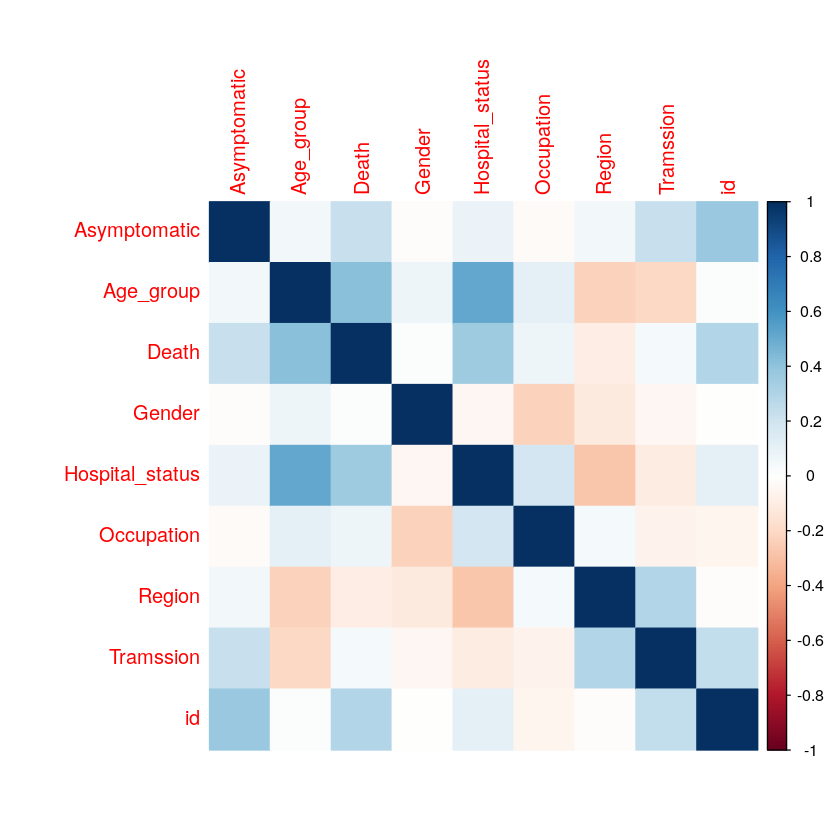

In [12]:
corrplot(cor(data_num),method = "color")

It can be seen from the correlation matrix, the Death Variable is correlated with Age group, Hospital Status, and Asymptomatic variables which means these variables have relation with death variable. So these variables are used to train the model to predict whether the patient will die or not.

# Modelling

### Split Data into test & train

In [13]:
data_num$Death <- as.factor(data_num$Death)
#Train Test
set.seed(101) 
#data_num<-slice(data_num, sample(1:n()))
split = sample.split(data_num$Death, SplitRatio = 0.70) 
train = subset(data_num, split == TRUE) 
test = subset(data_num, split == FALSE) 
train[-3] = scale(train[-3])
test[-3] = scale(test[-3])

For any machine learning model,After training the model using data it is also important to check whether the model is performing well with unseen data. So using sample. split command in R, 70% of the data is randomly divided to train the model and the remaining 30% data is hidden from the model so it can be used to validate the model.

### Model with different Variables

7 different models are built using all 7 variables and compared by increasing complexity for every model, starting with using only one variable(Age_group) that has a high correlation coefficient value with the death variable for Model 1 to using all variables one by one. The models used are

In [14]:
model = rep(0, 7)
model[1] <- "Death~ Age_group"
model[2] <- "Death~ Age_group+Hospital_status"
model[3] <- "Death~ Age_group+Asymptomatic+Hospital_status"
model[4] <- "Death~ Age_group+Region+Hospital_status+Asymptomatic"
model[5] <- "Death~ Age_group+Tramssion+Hospital_status+Asymptomatic+Region"
model[6] <- "Death~ Age_group+Tramssion+Hospital_status+Asymptomatic+Occupation+Region"
model[7] <- "Death~ Age_group+Tramssion+Hospital_status+Asymptomatic+Gender+Occupation+Region"

All 7 models are compared and 5 Fold cross-validation was used to estimate the performance of the model using different machine learning models. The machine learning models used are Support Vector Machine, Logistic Regression, Decision Tree, and Random Forest. And One standard error rule was used to choose the best model.
One standard error rule
For those who don’t know about one standard error rule, one standard error rule is used in cross-validation, in which we take the simplest model whose error is within one standard error of the best model (The model with Least error).
The reason for this is we should acknowledge that the error rate for each model from cross-validation has variation because they are chosen randomly from data. Since the minimum standard error also has variation, one standard error rule says that rather than picking a model that has minimum error rate, we will pick the simplest model that has error rate within one standard error of the minimum error rate, because if a model’s error rate is within one standard error of each other’s error rate, we can’t tell them apart based on the sample data we have.


## Support Vector Machine

[1] 0.1510067 0.1510067 0.1510067 0.1510067 0.1258389 0.1258389 0.1258389

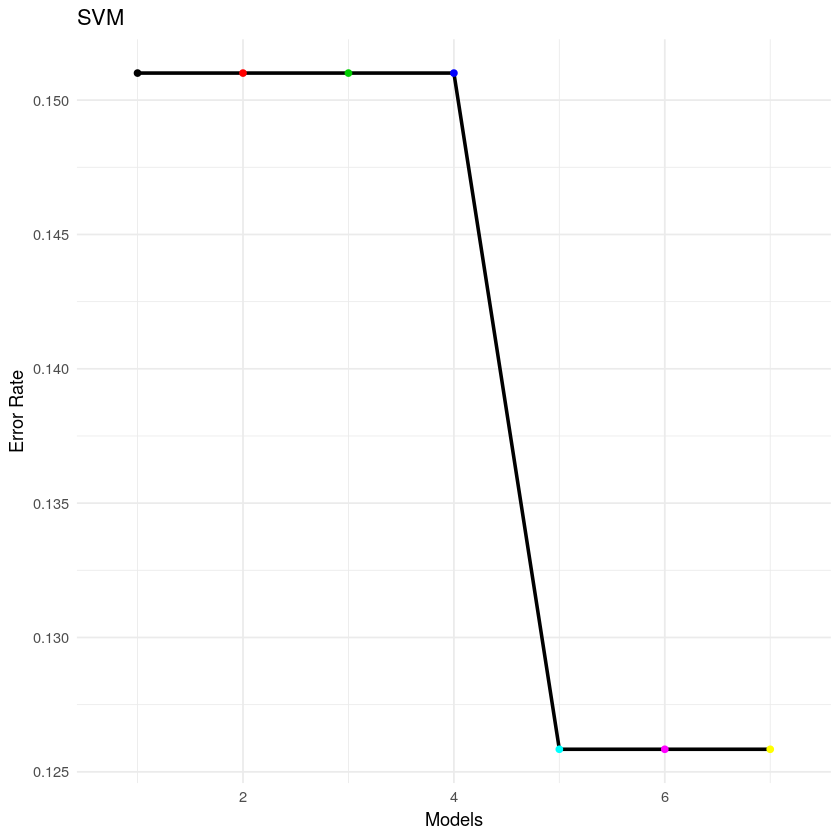

In [15]:
total_svm = rep(0,7)
j=1
for(j in 1:7){
svm_model <-svm(eval(parse(text=paste(model[j]))), 
                data = train, 
                type = 'C-classification', 
                kernel = 'linear')
y_pred_svm = predict(svm_model, test) 
cm=table(y_pred_svm, test$Death)
error_svm= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
total_svm[j]=total_svm[j]+error_svm
}
total_svm
total_rf=as.data.frame(total_svm)
#view(total_rf)
b6<-total_rf
a=c(1,2,3,4,5,6,7)
ds1<-data.frame(a,b6)
##view(ds1)
ggplot(ds1,aes(x=a, y=total_svm)) + 
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a)+labs(x="Models",
                                                        y="Error Rate",title ='SVM')

It can be seen that with the increase in complexity of the models the error rate is decreasing. The least error rate is observed from Model 5 with an error rate of 0.129(87.1% accuracy) and the error rate is the same for Model 6 and Model 7. Also, It can be seen that the average error rate is the same for Model 1, Model 2, Model 3 with an error rate of 0.151(84.9% accuracy).
So according to the graph to predict death using support vector machine only Age_group is enough. For slightly better accuracy Age_group, Hospital_status, Asymptomatic, Region, Transmission variables can be used.

## SVM with 5 fold cross validation

$Fold1
[1] 0.1505376 0.1505376 0.1505376 0.1505376 0.1505376 0.1505376 0.1505376

$Fold2
[1] 0.1510791 0.1510791 0.1510791 0.1510791 0.1474820 0.1546763 0.1582734

$Fold3
[1] 0.1505376 0.1505376 0.1541219 0.1541219 0.1433692 0.1433692 0.1433692

$Fold4
[1] 0.1510791 0.1510791 0.1510791 0.1510791 0.1294964 0.1294964 0.1294964

$Fold5
[1] 0.1510791 0.1510791 0.1510791 0.1510791 0.1510791 0.1510791 0.1510791

[1] 0.0003126365 0.0003126365 0.0016317048 0.0016317048 0.0092929567
[6] 0.0110513104 0.0122360998

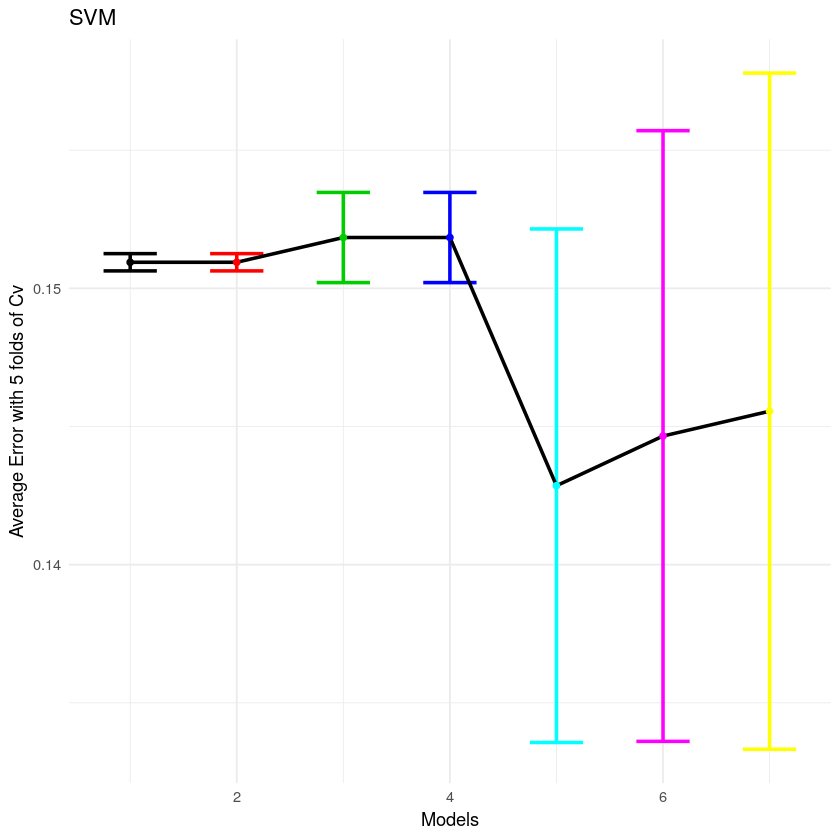

In [16]:
folds = createFolds(train$Death, k = 5)
svm1 = lapply(folds, function(x) {
  totalError = rep(0, 7)
  avgError = rep(0,7)
  j=1
  for(j in 1:7){
    training_fold = train[-x,]
    test_fold = train[x,]
    random_forest <- svm(eval(parse(text=paste(model[j]))), data=training_fold,type = 'C-classification', 
                         kernel = 'linear')
    y_pred = predict(random_forest, newdata = test_fold[-3])
    cm = table(test_fold[,3], y_pred)
    accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
    error_svm_cv= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
    totalError[j]= totalError[j]+error_svm_cv
  }
  ##view(totalError)
  #plot(totalError,type="l")
  return(totalError)
})
##view(model[j])
#plot(as.numeric(cv),type="l")
svm1
svm1=as.data.frame(svm1)
##view(svm1)

b1=data.frame(b1=rowMeans(svm1[,-1]))
c<-svm1 %>%mutate(stDev = apply(.[(1:4)],1,sd))
c1<-c$stDev
c1
a1=c(1,2,3,4,5,6,7)
#data.frame(dt,stringsAsFactors = TRUE)
svm2<-data.frame(a1,b1,c1)
#plot(x=x,y=avg)
##view(cv)
##view(svm2)
ggplot(svm2,aes(x=a1, y=b1)) + 
  geom_errorbar(aes(ymin=b1-c1, ymax=b1+c1), width=0.5, position=position_dodge(0.5),color=a1,size=1) +
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a1)+labs(x="Models",
                                                        y="Average Error with 5 folds of Cv",title ='SVM')


It can be seen that Model 5(Death~ Age_group+ Hospital_status+Asymptomatic+Region) has a minimum error rate in comparison to all other models. And also with the increase in complexity of the models the error rate is decreasing until Model 5 and then started increasing. But Model 1, Model 2, Model 3, Model 4 falls below the standard error of Model 5. So according to one standard error rule, the simplest model should be chosen among these 4 models which is Model 1 with only one variable. So for support vector machine to predict death rate only Age_group is enough.
Also, The range of error rate after performing cross-validation is identical which proves our model is consistent.

## Logistic Regression

[1] 0.1510067 0.1291946 0.1291946 0.1359060 0.1291946 0.1275168 0.1258389

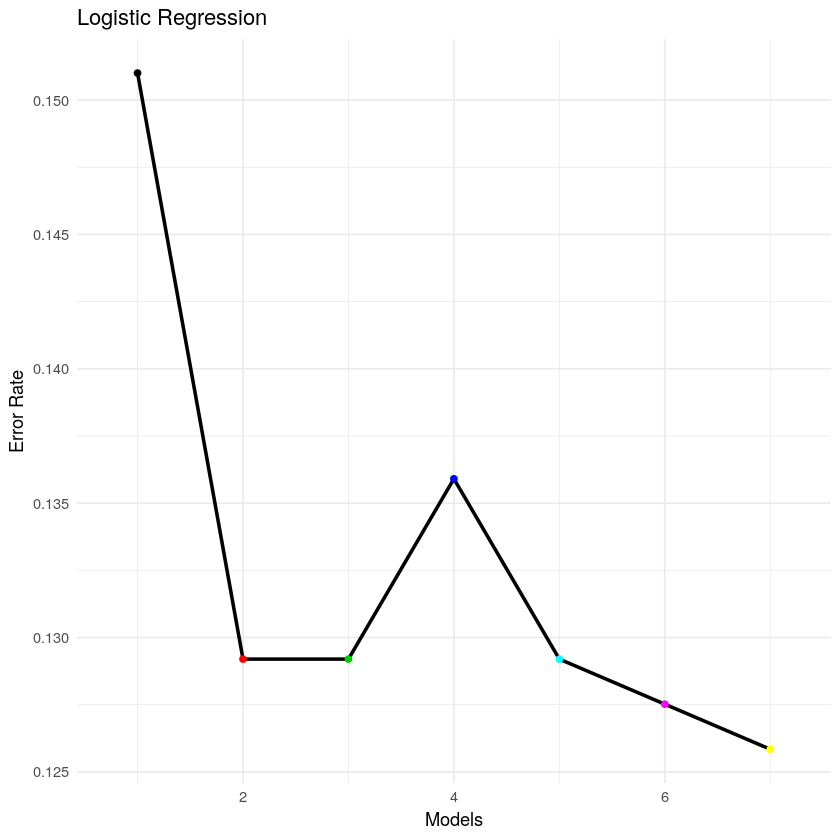

In [17]:
total_lr = rep(0,7)
j=1
for(j in 1:7){
  
logisticregression <- train(eval(parse(text=paste(model[j]))), data=train, family=binomial,method='glm')
preds <- predict(logisticregression,test)
cm= table(preds,as.factor(test$Death))
error_lr= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
total_lr[j]=total_lr[j]+error_lr
}
total_lr
total_lr=as.data.frame(total_lr)
##view(total_lr)
b7<-total_lr
a=c(1,2,3,4,5,6,7)
dl1<-data.frame(a,b7)
##view(dl1)
ggplot(dl1,aes(x=a, y=total_lr)) + 
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a)+labs(x="Models",
                                                        y="Error Rate",title ='Logistic Regression')


In the case of logistic regression, Model 6 was best performing with an error rate of 0.115 (88.5% accuracy) followed by Model 5 and Model 3. And Model 1 was least performing with an error rate of 0.151 (84.9% accuracy). Even here the error rate was decreasing with the increase in model complexity until Model 3 and increased slightly for Model 4 and reduced again.
So according to the graph in fig 5. if we have Age_group, Hospital_status, Asymptomatic, Region, Transmission, and Occupation we can predict death rate with 88.5% accuracy.

## Logistic Regression with 5 fold cross validation

This Fig shows the average error rates for all 7 models using Logistic Regression after 5 fold cross-validation was performed and standard error was plotted to identify the best model using one standard error rule.

$Fold1
[1] 0.1510791 0.1474820 0.1438849 0.1402878 0.1402878 0.1402878 0.1402878

$Fold2
[1] 0.1510791 0.1402878 0.1402878 0.1258993 0.1330935 0.1330935 0.1330935

$Fold3
[1] 0.1505376 0.1326165 0.1433692 0.1433692 0.1433692 0.1433692 0.1469534

$Fold4
[1] 0.1505376 0.1433692 0.1541219 0.1577061 0.1577061 0.1577061 0.1469534

$Fold5
[1] 0.1510791 0.1223022 0.1187050 0.1223022 0.1115108 0.1187050 0.1187050

[1] 0.0003126365 0.0062823856 0.0060173247 0.0130458788 0.0103342671
[6] 0.0103342671 0.0066131881

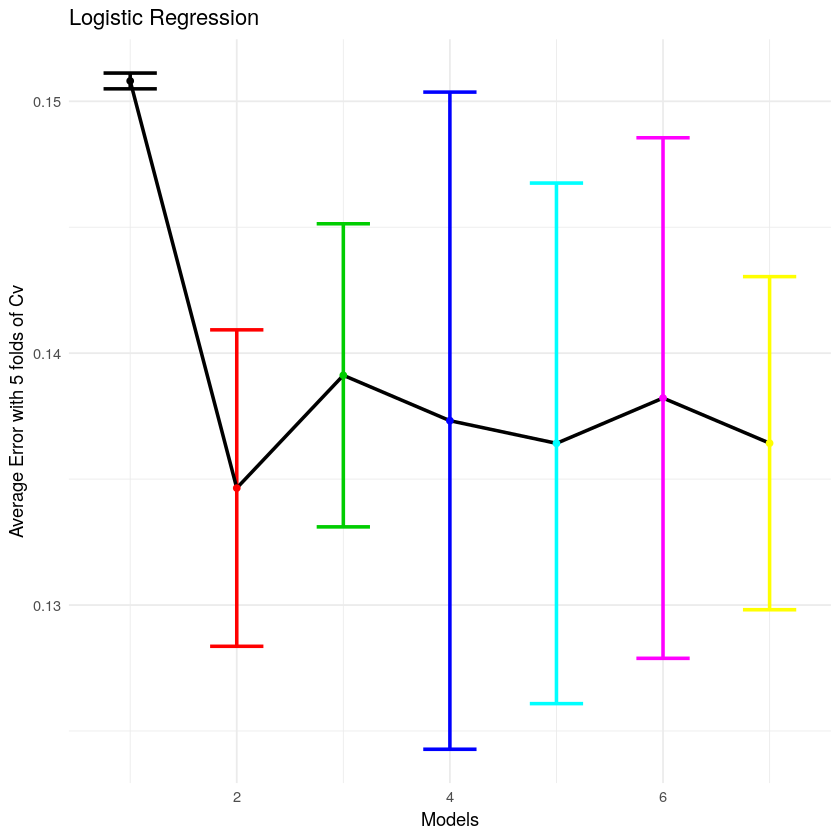

In [18]:
folds = createFolds(train$Death, k = 5)
lr1 = lapply(folds, function(x) {
  totalError = rep(0, 7)
  avgError = rep(0,7)
  j=1
  for(j in 1:7){
    training_fold = train[-x,]
    test_fold = train[x,]
    logistic <- train(eval(parse(text=paste(model[j]))), data=training_fold, family=binomial,method='glm')
    y_pred = predict(logistic, newdata = test_fold[-3])
    cm = table(test_fold[,3], y_pred)
    accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
    error_svm_cv= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
    totalError[j]= totalError[j]+error_svm_cv
  }
  ##view(totalError)
  #plot(totalError,type="l")
  return(totalError)
})
lr1
lr1=as.data.frame(lr1)
##view(lr1)

b2=data.frame(b2=rowMeans(lr1[,-1]))
c<-lr1 %>%mutate(stDev = apply(.[(1:4)],1,sd))
c2<-c$stDev
c2
a2=c(1,2,3,4,5,6,7)
#data.frame(dt,stringsAsFactors = TRUE)
lr2<-data.frame(a2,b2,c2)
##view(lr2)
ggplot(lr2,aes(x=a2, y=b2)) + 
  geom_errorbar(aes(ymin=b2-c2, ymax=b2+c2), width=0.5, position=position_dodge(0.5),color=a2,size=1) +
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a2)+labs(x="Models",
                                                         y="Average Error with 5 folds of Cv",title ='Logistic Regression')


From this fig the best is model after performing cross-validation is Model 3 with an error rate of 0.1356(accuracy= 86.44). The simplest model that falls under the standard deviation of Model 3 is Model 2. Using One standard error rule Model 2 is selected as the best model. The death rate can be predicted using logistic regression with an accuracy of 86.5% using Age_group, Hospital_status variables. Also, The range of error rate after performing cross-validation is identical which proves our model is consistent.

## Decision Tree

[1] 0.1510067 0.1258389 0.1224832 0.1224832 0.1258389 0.1258389 0.1258389

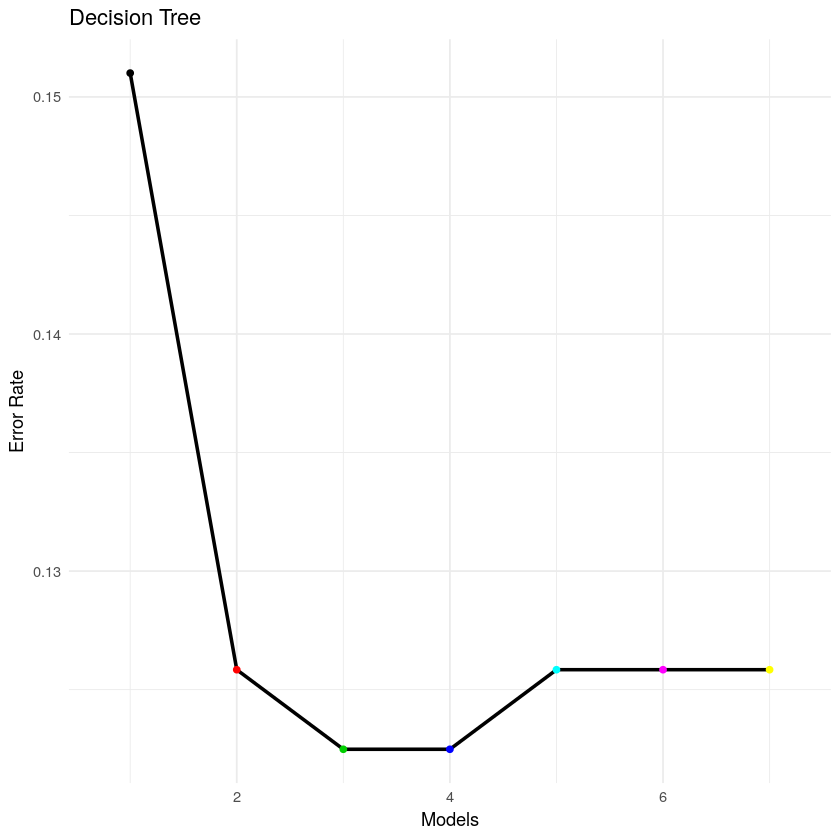

In [19]:
total_dt = rep(0,7)
j=1
for(j in 1:7){
Decision_tree <- ctree(eval(parse(text=paste(model[j]))), data=train)
pred_dt <- predict(Decision_tree, test)
cm=table(pred_dt, test$Death)
error_dt= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
total_dt[j]=total_dt[j]+error_dt
}
total_dt
total_dt=as.data.frame(total_dt)
##view(total_lr)
b8<-total_dt
a=c(1,2,3,4,5,6,7)
dt1<-data.frame(a,b8)
##view(dl1)
ggplot(dt1,aes(x=a, y=total_dt)) + 
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a)+labs(x="Models",
                                                        y="Error Rate",title ='Decision Tree')

In the case of the Decision Tree, Model 3 and Model 4 are best performing models with an error rate of 12.1(Accuracy= 87.9), and the error rate started increasing after Model 4 with the increase in the complexity of the model. And Model 1 was least performing with an error rate of 0.151 (84.9% accuracy). Here the error rate was decreasing with the increase in model complexity until Model 4 and increased slightly for Model 5 and was consistent for Model 6,7.

## Decison Tree with 5 fold cross validation

This Fig shows the average error rates for all 7 models after 5 fold cross-validation was performed and standard error was plotted to identify the best model using one standard error rule using Decision Tree.

$Fold1
[1] 0.1505376 0.1505376 0.1433692 0.1433692 0.1433692 0.1433692 0.1433692

$Fold2
[1] 0.1510791 0.1402878 0.1258993 0.1258993 0.1330935 0.1330935 0.1330935

$Fold3
[1] 0.1510791 0.1546763 0.1402878 0.1402878 0.1402878 0.1402878 0.1402878

$Fold4
[1] 0.1505376 0.1218638 0.1218638 0.1218638 0.1254480 0.1362007 0.1362007

$Fold5
[1] 0.1510791 0.1151079 0.1115108 0.1115108 0.1079137 0.1079137 0.1079137

[1] 0.0003126365 0.0146273305 0.0105669687 0.0105669687 0.0079931234
[6] 0.0045146673 0.0045146673

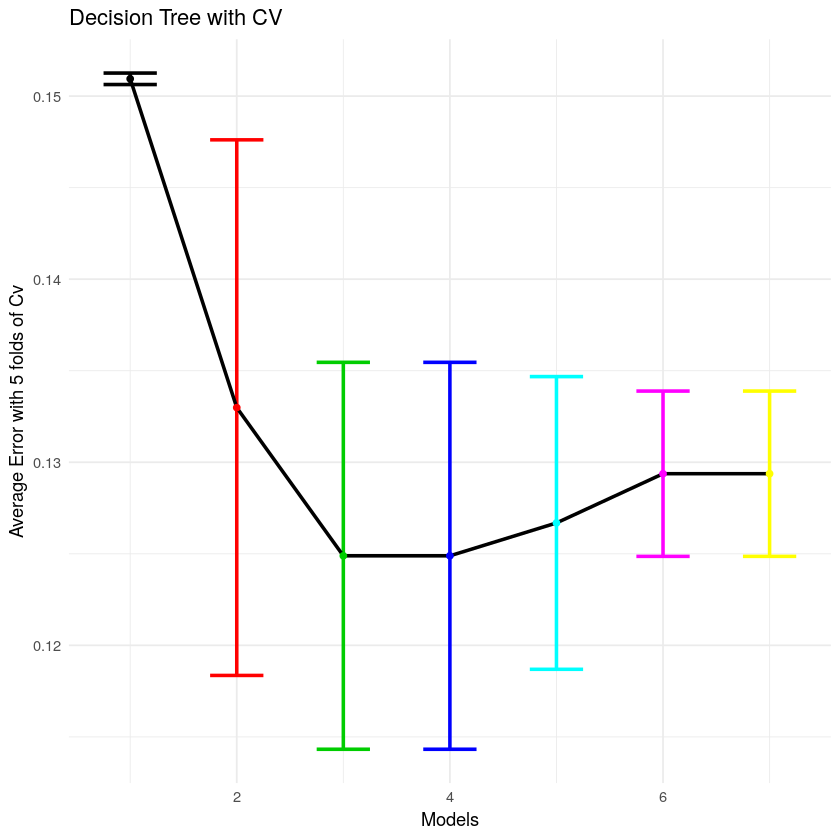

In [20]:
folds = createFolds(train$Death, k = 5)
dt = lapply(folds, function(x) {
  totalError = rep(0, 7)
  avgError = rep(0,7)
  j=1
  for(j in 1:7){
  training_fold = train[-x,]
  test_fold = train[x,]
  Decision_tree <- ctree(eval(parse(text=paste(model[j]))), data=training_fold)
  y_pred = predict(Decision_tree, newdata = test_fold[-3])
  cm = table(test_fold[,3], y_pred)
  accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  error_dt_cv= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  totalError[j]= totalError[j]+error_dt_cv
  }
  ##view(totalError)
  #plot(totalError,type="l")
  return(totalError)
})
##view(model[j])
#plot(as.numeric(cv),type="l")
dt
dt=as.data.frame(dt)
#view(dt)

b=data.frame(b=rowMeans(dt[,-1]))
c<-dt %>%mutate(stDev = apply(.[(1:4)],1,sd))
c<-c$stDev
c
a=c(1,2,3,4,5,6,7)
#data.frame(dt,stringsAsFactors = TRUE)
df<-data.frame(a,b,c)
#plot(x=x,y=avg)
##view(cv)
##view(df)
ggplot(df,aes(x=a, y=b)) + 
  geom_errorbar(aes(ymin=b-c, ymax=b+c), width=0.5, position=position_dodge(0.5),color=a,size=1) +
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a)+labs(x="Models",
                                      y="Average Error with 5 folds of Cv",title ='Decision Tree with CV')


It can be seen that after performing CV the error rate remained the same for Model 4 and Model 5 with an error rate of 0.122(accuracy= 88.8). The simplest model that falls under the standard deviation of the Model 4,5 is Model 3. Using One standard error rule Model 3 is selected as the best model. The death rate can be predicted using a Decision tree with an accuracy of 87.6% using Age_group, Hospital_status, Asymptomatic, Region. Also, The range of error rate after performing cross-validation is identical which proves our model is consistent.

## Random Forest

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



[1] 0.1510067 0.1258389 0.1208054 0.1191275 0.1174497 0.1140940 0.1140940

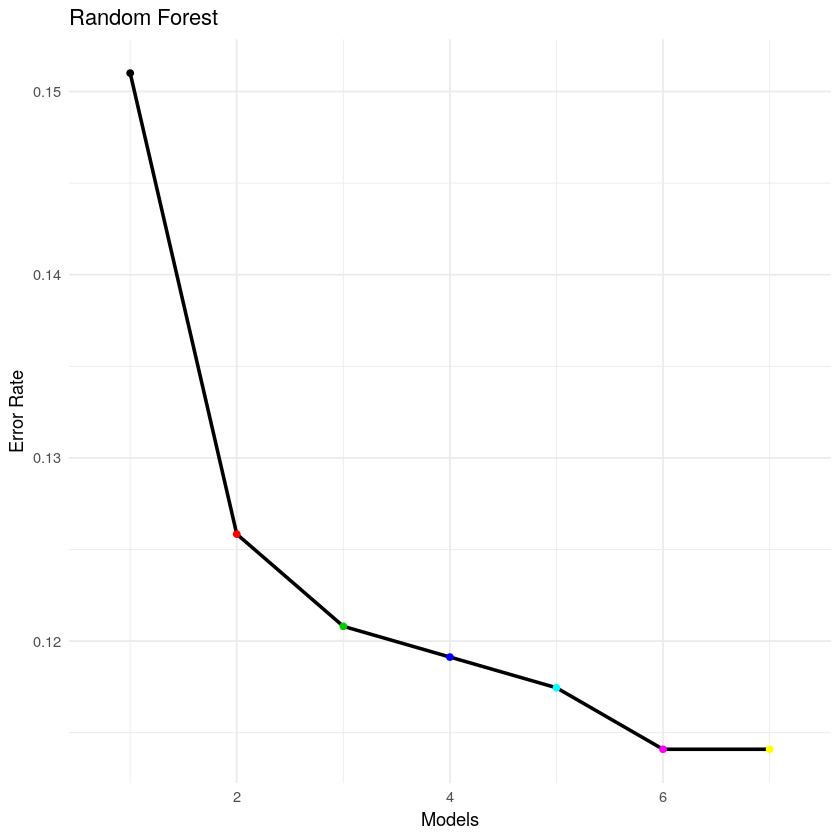

In [21]:
defaultW <- getOption("warn") 
options(warn = -1) 
total_rf = rep(0, 7)
j=1
for(j in 1:7){
  Random_Forest <- train(eval(parse(text=paste(model[j]))), data=train, method='rf')
  pred_rf <- predict(Random_Forest, test)
  #confusionMatrix(pred_rf, test$Death)
  cm= table(pred_rf,as.factor(test$Death))
  error_rf= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  total_rf[j]=total_rf[j]+error_rf
}
total_rf
total_rf=as.data.frame(total_rf)
##view(total_rf)
b5<-total_rf
a=c(1,2,3,4,5,6,7)
dr1<-data.frame(a,b5)
##view(dr1)
ggplot(dr1,aes(x=a, y=total_rf)) + 
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a)+labs(x="Models",
                                                         y="Error Rate",title ='Random Forest')

options(warn = defaultW)


The best performing model here for the random forest is Model 6 with an error rate of 0.119 (accuracy = 88.1) and the error rate remained the same for model 7. The least performing model here again is Model 1 with an error rate of 0.151(accuracy = 84.9). It is surprising to see with the Age_group variable alone every model is able to predict whether the patient will die or not with 85% accuracy. Even here it can be seen that the error rate was constantly decreasing with the increase in the complexity of the model.The Variable Importance of random forest was plotted to confirm which factors have the highest impact to predict death.

### Variable Importance for Random Forest

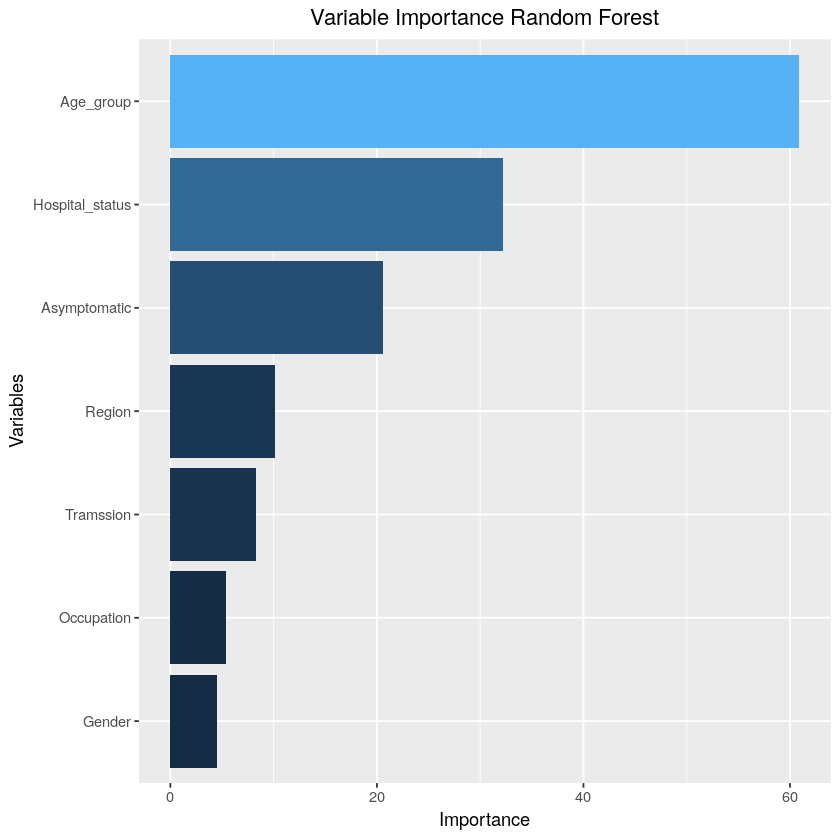

In [22]:
rf_imp <- varImp(Random_Forest, scale = FALSE)
rf_imp <- rf_imp$importance
rf_gini <- data.frame(Variables = row.names(rf_imp), MeanDecreaseGini = rf_imp$Overall)

ggplot(rf_gini, aes(x=reorder(Variables, MeanDecreaseGini), y=MeanDecreaseGini, fill=MeanDecreaseGini)) +
  geom_bar(stat='identity') + coord_flip() + theme(legend.position="none") + labs(x="Variables",y="Importance") +
  ggtitle('Variable Importance Random Forest') + theme(plot.title = element_text(hjust = 0.5))

It can be seen that as expected Age group, Hospital Status, Asymptomatic variables had more importance.

## Random Forest with 5 fold cross validation

This Fig shows the average error rates for all 7 models after 5 fold cross-validation was performed and standard error was plotted to identify the best model using one standard error rule for Random Forest.

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



$Fold1
[1] 0.1505376 0.1290323 0.1290323 0.1254480 0.1182796 0.1182796 0.1146953

$Fold2
[1] 0.15107914 0.12589928 0.10431655 0.10791367 0.10431655 0.09712230 0.08633094

$Fold3
[1] 0.1510791 0.1366906 0.1330935 0.1366906 0.1294964 0.1330935 0.1294964

$Fold4
[1] 0.1505376 0.1433692 0.1362007 0.1326165 0.1290323 0.1254480 0.1218638

$Fold5
[1] 0.1510791 0.1510791 0.1366906 0.1258993 0.1223022 0.1223022 0.1294964

[1] 0.0003126365 0.0078542306 0.0145290413 0.0127154091 0.0118374780
[6] 0.0154736317 0.0188394453

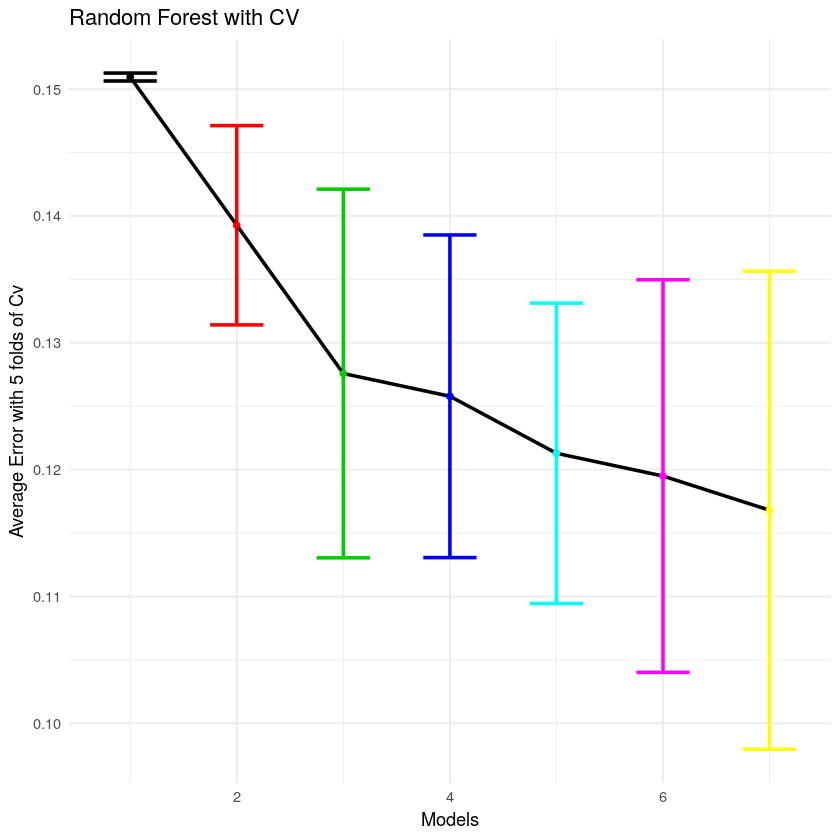

In [23]:
defaultW <- getOption("warn") 
options(warn = -1) 
folds = createFolds(train$Death, k = 5)
rf = lapply(folds, function(x) {
  totalError = rep(0, 7)
  avgError = rep(0,7)
  j=1
  for(j in 1:7){
    training_fold = train[-x,]
    test_fold = train[x,]
    random_forest <- train(eval(parse(text=paste(model[j]))), data=training_fold, method='rf')
    y_pred = predict(random_forest, newdata = test_fold[-3])
    cm = table(test_fold[,3], y_pred)
    accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
    error_dt_cv= 1- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
    totalError[j]= totalError[j]+error_dt_cv
  }
  ##view(totalError)
  #plot(totalError,type="l")
  return(totalError)
})
##view(model[j])
#plot(as.numeric(cv),type="l")
rf
rf=as.data.frame(rf)
##view(rf)

b3=data.frame(b3=rowMeans(rf[,-1]))
c<-rf %>%mutate(stDev = apply(.[(1:4)],1,sd))
c3<-c$stDev
c3
a3=c(1,2,3,4,5,6,7)
#data.frame(dt,stringsAsFactors = TRUE)
dr<-data.frame(a3,b3,c3)
#plot(x=x,y=avg)
##view(cv)
##view(dr)
ggplot(dr,aes(x=a3, y=b3)) + 
  geom_errorbar(aes(ymin=b3-c3, ymax=b3+c3), width=0.5, position=position_dodge(0.5),color=a3,size=1) +
  geom_line(position=position_dodge(0.5),size=1) +theme_minimal()+
  geom_point(position=position_dodge(0.5),color=a3)+labs(x="Models",
                                                        y="Average Error with 5 folds of Cv",title ='Random Forest with CV')
options(warn = defaultW)



The error rate for Model 4 and Model 5 is the same with an error rate of 0.1301. The simplest model that falls under the standard deviation of Model 4 and Model 5 is Model 3. Using One standard error rule Model 3 is selected as the best model. So for Random forest, The death rate can be predicted using logistic regression with an accuracy of 87% using Age_group, Hospital_status, Asymptomatic variables. Also, The range of error rate after performing cross-validation is identical which proves our model is consistent.

# Conclusion

After comparing all 7 models using Support Vector Machine, Logistic Regression, Decision Tree, and Random Forest machine learning models. Decision Tree machine learning model can predict death rate with more accuracy followed by Random Forest. Using One standard error rule we can see that Model 3 is the best performing model for both Decision Tree and Random Forest with variables Age_group, Hospital_status, Asymptomatic.
To conclude,When the Age Group of the patient, Hospital Status, and whether the patient is showing symptoms or not is known. Using Random Forest we can predict whether the patient is going to die or not with almost 88% accuracy. This helps health care workers to identify the patients with the highest risk of death so more priority can be given to those patients. Even though the accuracy is 88% that means the error rate is 12% here which is a bit high for the Health Care sector since we are dealing with patient life. So the model should be trained with more data and also should be improved using hyper tuning to reduce the error rate before using in the health care sector for decision making.